In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [7]:
data = pd.read_csv(data_file, skiprows=1)
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202144          7   8680     5343   12017      13           8   
1     202143          7   8164     5179   11149      12           7   
2     202142          7   9443     6037   12849      14           9   
3     202141          7   4021     2239    5803       6           3   
4     202140          7   4441     2454    6428       7           4   
5     202139          7   2291     1056    3526       3           1   
6     202138          7   4325     2267    6383       7           4   
7     202137          7   1964      754    3174       3           1   
8     202136          7   3441     1730    5152       5           2   
9     202135          7   2562     1107    4017       4           2   
10    202134          7   1429      378    2480       2           0   
11    202133          7   3829     1830    5828       6           3   
12    202132          7   4108     1895    6321       6           3   
13    202131          7   4793     2301    7285       7           3   
14    202130          7   7190     4191   10189      11           6   
15    202129          7   6800     4109    9491      10           6   
16    202128          7   9734        0   21731      15           0   
17    202127          7   9026     4316   13736      14           7   
18    202126          7   7284     4108   10460      11           6   
19    202125          7   9351     6540   12162      14          10   
20    202124          7  12034     8937   15131      18          13   
21    202123          7   9116     6420   11812      14          10   
22    202122          7   4817     2752    6882       7           4   
23    202121          7   6092     3458    8726       9           5   
24    202120          7   7485     4601   10369      11           7   
25    202119          7   6654     4370    8938      10           7   
26    202118          7   3912     2110    5714       6           3   
27    202117          7   4686     2878    6494       7           4   
28    202116          7   4780     2891    6669       7           4   
29    202115          7  11215     7627   14803      17          12   
...      ...        ...    ...      ...     ...     ...         ...   
1584  199126          7  17608    11304   23912      31          20   
1585  199125          7  16169    10700   21638      28          18   
1586  199124          7  16171    10071   22271      28          17   
1587  199123          7  11947     7671   16223      21          13   
1588  199122          7  15452     9953   20951      27          17   
1589  199121          7  14903     8975   20831      26          16   
1590  199120          7  19053    12742   25364      34          23   
1591  199119          7  16739    11246   22232      29          19   
1592  199118          7  21385    13882   28888      38          25   
1593  199117          7  13462     8877   18047      24          16   
1594  199116          7  14857    10068   19646      26          18   
1595  199115          7  13975     9781   18169      25          18   
1596  199114          7  12265     7684   16846      22          14   
1597  199113          7   9567     6041   13093      17          11   
1598  199112          7  10864     7331   14397      19          13   
1599  199111          7  15574    11184   19964      27          19   
1600  199110          7  16643    11372   21914      29          20   
1601  199109          7  13741     8780   18702      24          15   
1602  199108          7  13289     8813   17765      23          15   
1603  199107          7  12337     8077   16597      22          15   
1604  199106          7  10877     7013   14741      19          12   
1605  199105          7  10442     6544   14340      18          11   
1606  199104          7   7913     4563   11263      14           8   
1607  199103          7  15387    10484   20290      27          18   
1608  199102          7  16277  

In [8]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [9]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [10]:
sorted_data = data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2021-04-12/2021-04-18  202115          7  11215     7627   14803      17   
2021-04-19/2021-04-25  202116          7   4780     2891    6669       7   
2021-04-26/2021-05-02  202117          7   4686     2878    6494       7   
2021-05-03/2021-05-09  202118          7   3912     2110    5714       6   
2021-05-10/2021-05-16  202119          7   6654     4370    8938      10   
2021-05-17/2021-05-23  202120          7   7485     4601   10369      11   
2021-05-24/2021-05-30  202121          7   6092     3458    8726       9   
2021-05-31/2021-06-06  202122          7   4817     2752    6882       7   
2021-06-07/2021-06-13  202123          7   9116     6420   11812      14   
2021-06-14/2021-06-20  202124          7  12034     8937   15131      18   
2021-06-21/2021-06-27  202125          7   9351     6540   12162      14   
2021-06-28/2021-07-04  202126          7   7284     4108   10460      11   
2021-07-05/2021-07-11  202127          7   9026     4316   13736      14   
2021-07-12/2021-07-18  202128          7   9734        0   21731      15   
2021-07-19/2021-07-25  202129          7   6800     4109    9491      10   
2021-07-26/2021-08-01  202130          7   7190     4191   10189      11   
2021-08-02/2021-08-08  202131          7   4793     2301    7285       7   
2021-08-09/2021-08-15  202132          7   4108     1895    6321       6   
2021-08-16/2021-08-22  202133          7   3829     1830    5828       6   
2021-08-23/2021-08-29  202134          7   1429      378    2480       2 

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

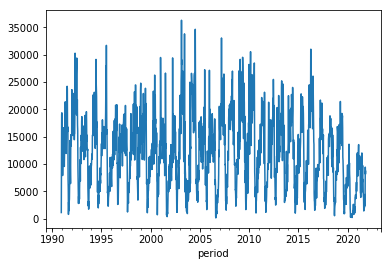

In [12]:
sorted_data['inc'].plot()

In [33]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [34]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

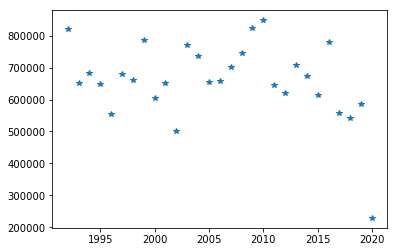

In [35]:
yearly_incidence.plot(style='*')

In [36]:
yearly_incidence.sort_values()

2020    229363
2002    502271
2018    543281
1996    553859
2017    557449
2019    584926
2000    605096
2015    613286
2012    620315
2011    645042
1995    648598
2001    650660
1993    653058
2005    654308
2006    657482
1998    660316
2014    673458
1997    679308
1994    682920
2007    701566
2013    708874
2004    736266
2008    745701
2003    770211
2016    780645
1999    784963
1992    821558
2009    822819
2010    848236
dtype: int64

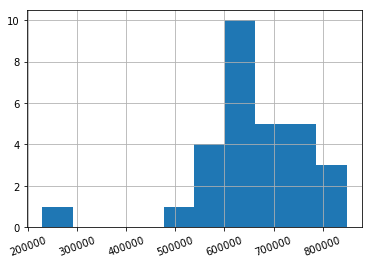

In [37]:
yearly_incidence.hist(xrot=20)